In [1]:
import pandas as p
from pandas import DataFrame
import numpy as n
import matplotlib.pyplot as m

import math as math

In [2]:
dataset = p.read_csv("Bothell_Housing.csv")

In [3]:
colnames = ['CITY','BEDS','BATHS','SQUARE FEET','PRICE']

In [4]:
dataBase = dataset[dataset.CITY=='Bothell']
dataBase = dataBase[colnames]

In [5]:
dataBase.shape

(335, 5)

In [6]:
dataBase.dropna(how='all')
dataBase.fillna(dataBase.mean())

,CITY,BEDS,BATHS,SQUARE FEET,PRICE
0,Bothell,3,1.500000,1232.00000,394950
1,Bothell,2,1.000000,887.00000,290000
2,Bothell,2,2.000000,1018.00000,320000
3,Bothell,4,2.500000,1854.00000,555000
4,Bothell,4,2.750000,2111.00000,625000
5,Bothell,4,2.500000,2925.00000,740000
6,Bothell,3,2.250000,1650.00000,600000
7,Bothell,3,1.750000,1396.00000,375000
8,Bothell,4,2.000000,2495.00000,565000
9,Bothell,2,2.000000,1096.00000,440000


In [7]:
feature_cols = ['CITY','BEDS','BATHS','SQUARE FEET']
dataBase['CITY']= p.factorize(dataBase['CITY'])[0] + 1
X = dataBase[feature_cols]
X.head()

,CITY,BEDS,BATHS,SQUARE FEET
0,1,3,1.50,1232.0
1,1,2,1.00,887.0
2,1,2,2.00,1018.0
3,1,4,2.50,1854.0
4,1,4,2.75,2111.0


In [8]:
Y = dataBase['PRICE']
Y.shape

(335,)

In [9]:
#spit data to training set , testing set, validating set (60 - 20 - 20)
x_train = X[:math.floor(len(X) * 0.6)]
y_train = Y[:math.floor(len(Y) * 0.6)]

x_val = X[math.floor(len(X) * 0.6):math.floor(len(X) * 0.8)]
y_val = Y[math.floor(len(Y) * 0.6):math.floor(len(Y) * 0.8)]

x_test =  X[math.floor(len(X) * 0.8):]
y_test =  Y[math.floor(len(Y) * 0.8):]

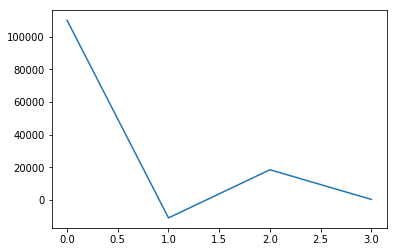

In [10]:
#Determine equation using training data - {(xT . x)-1 . xT.y = theta}
x_T = n.transpose(x_train)
xTx = n.matmul(x_T,x_train)
i_xTx = n.linalg.inv(xTx)
xT_y = n.matmul(x_T,y_train)
theta = n.matmul(i_xTx,xT_y)
m.plot(theta)

In [11]:
#now find the cost function with validation data set
xVal_Th = n.matmul(x_val,theta)
cost = (xVal_Th - y_val) ** 2
mse = n.sum(cost)

In [12]:
rmse = n.sqrt(mse)/len(cost)
print(rmse)

12362.740626284167


In [13]:
new_Y = n.matmul ( x_test ,theta )

**************** Prediction using #beds **********************


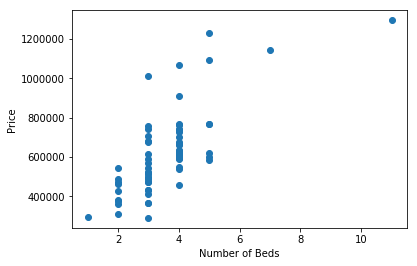

**************** Testing Data Plot using #beds **********************


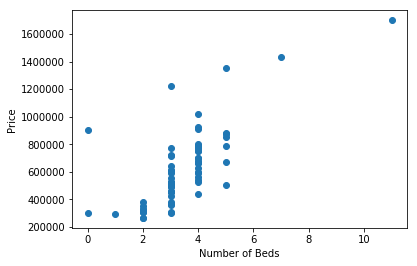

In [14]:
print("**************** Prediction using #beds **********************")
m.scatter(x_test['BEDS'],new_Y)
m.xlabel("Number of Beds")
m.ylabel("Price")
m.show()

print("**************** Testing Data Plot using #beds **********************")
m.scatter(x_test['BEDS'],y_test)
m.xlabel("Number of Beds")
m.ylabel("Price")
m.show()

**************** Prediction using #Baths **********************


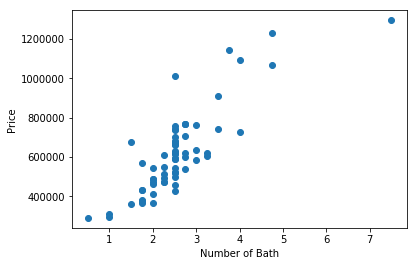

**************** Testing Data Plot using #Baths **********************


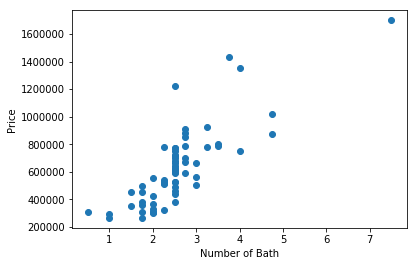

In [15]:
print("**************** Prediction using #Baths **********************")
m.scatter(x_test['BATHS'],new_Y)
m.xlabel("Number of Bath")
m.ylabel("Price")
m.show()

print("**************** Testing Data Plot using #Baths **********************")
m.scatter(x_test['BATHS'],y_test)
m.xlabel("Number of Bath")
m.ylabel("Price")
m.show()

**************** Prediction using SQUARE FEET **********************


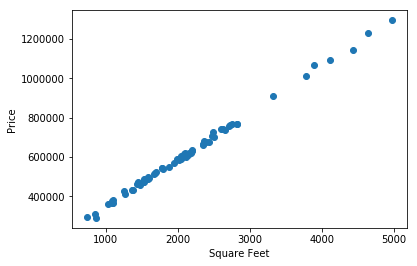

**************** Testing Data Plot using SQUARE FEET **********************


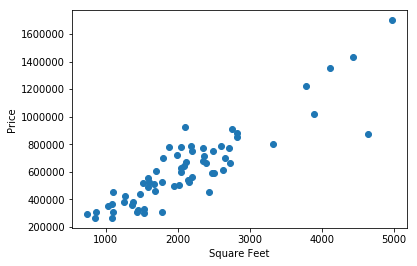

In [16]:
print("**************** Prediction using SQUARE FEET **********************")
m.scatter(x_test['SQUARE FEET'],new_Y)
m.xlabel("Square Feet")
m.ylabel("Price")
m.show()
print("**************** Testing Data Plot using SQUARE FEET **********************")
m.scatter(x_test['SQUARE FEET'],y_test)
m.xlabel("Square Feet")
m.ylabel("Price")
m.show()


D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Actual Result')

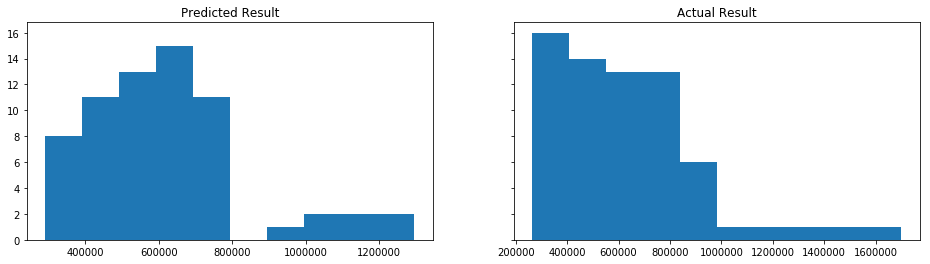

In [17]:
fig, arr = m.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(4)

arr[0].hist(new_Y)
arr[0].set_title('Predicted Result')

arr[1].hist(y_test)
arr[1].set_title('Actual Result')